<a href="https://colab.research.google.com/github/monosij777/An-Ensemble-GAN-Enhanced-Modulated-Deep-Learning-Model-for-Intelligent-Pancreatic-Tumor-Detection/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 2.Load the Dataset and Mask Directories

In [ ]:
import os

# Set root directory for your dataset

root_dir = '/content/drive/MyDrive/archive'

# Dataset and Mask paths
dataset_dir = os.path.join(root_dir, 'Dataset', 'Dataset')
mask_dir = os.path.join(root_dir, 'Mask', 'Mask')

# Subfolders under Dataset
X_train_dir = os.path.join(dataset_dir, 'X_train')
X_test_dir = os.path.join(dataset_dir, 'X_test')
Y_train_dir = os.path.join(dataset_dir, 'Y_train')
Y_test_dir = os.path.join(dataset_dir, 'Y_test')

# Subfolders under Mask
Y_train_Organ_dir = os.path.join(mask_dir, 'Y_train_Organ')
Y_test_Cancer_dir = os.path.join(mask_dir, 'Y_test_Cancer')
Y_test_Organ_dir = os.path.join(mask_dir, 'Y_test_Organ')
Y_train_Cancer_dir = os.path.join(mask_dir, 'Y_train_Cancer')


In [ ]:
X_train_dir

'/content/drive/MyDrive/archive/Dataset/Dataset/X_train'

# 3. Exploratory Data Analysis

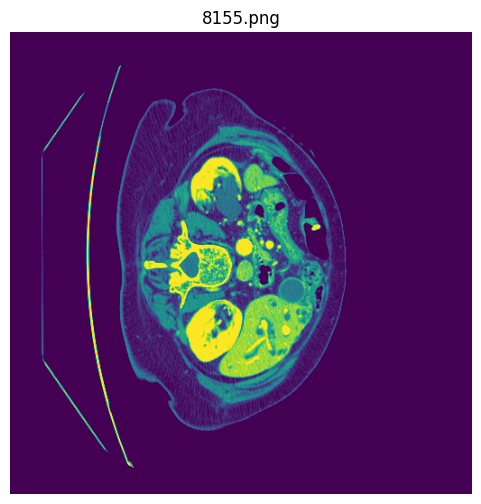

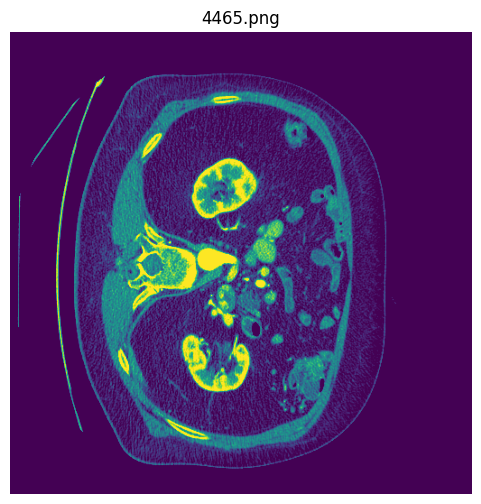

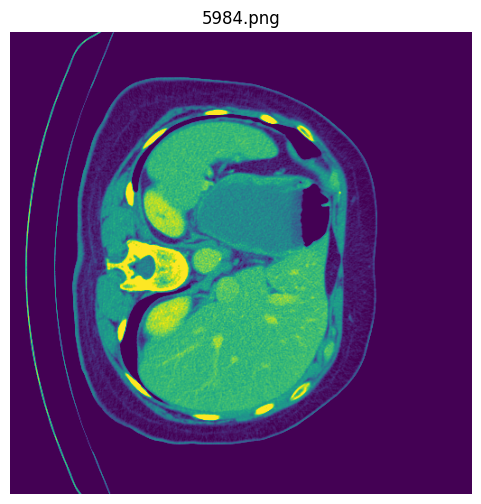

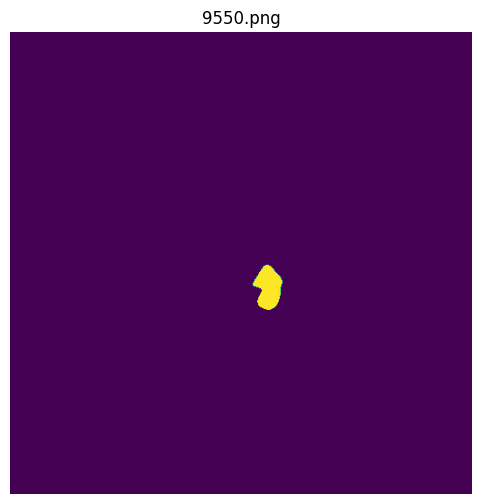

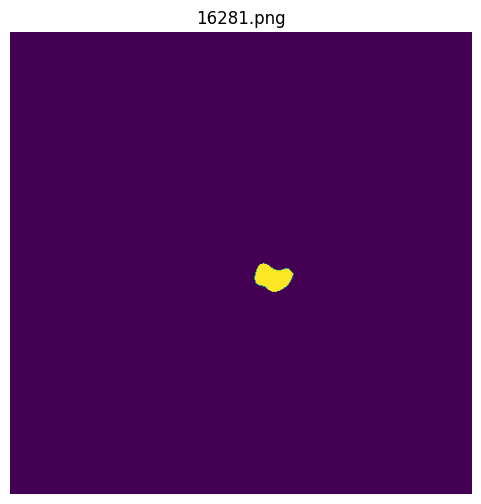

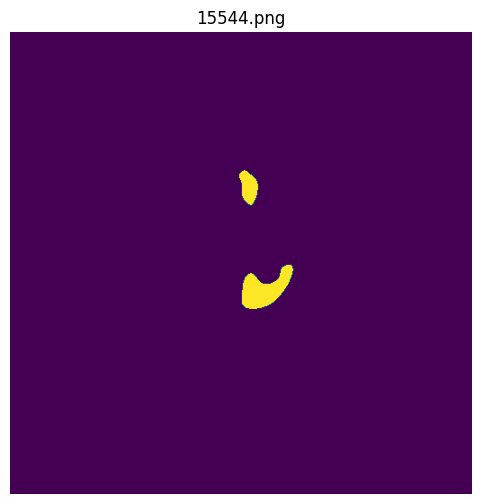

In [ ]:
import random
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Function to display random images from a folder
def display_random_images_from_folder(folder, n_images=5):
    images = os.listdir(folder)
    random_images = random.sample(images, n_images)

    for img_name in random_images:
        img_path = os.path.join(folder, img_name)
        image = Image.open(img_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.title(img_name)
        plt.axis('off')
        plt.show()

# Display random images from X_train
display_random_images_from_folder(X_train_dir, 3)

# Display random images from Y_train
display_random_images_from_folder(Y_train_dir, 3)


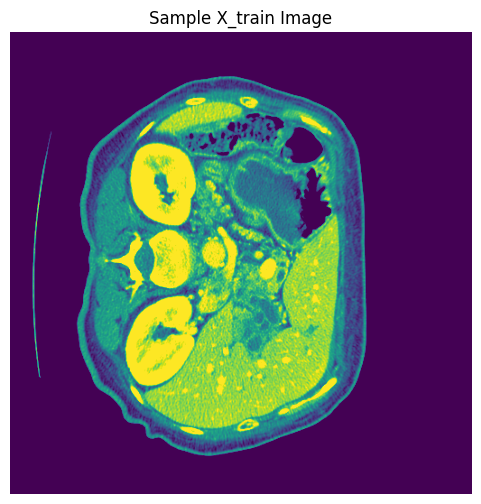

In [ ]:
# Function to load and display a random image
def display_image(image_path, title="Image"):
    image = Image.open(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Displaying a sample image from X_train folder
sample_image_path = os.path.join(X_train_dir, os.listdir(X_train_dir)[0])
display_image(sample_image_path, "Sample X_train Image")

## 3.1 Contour Detection on images

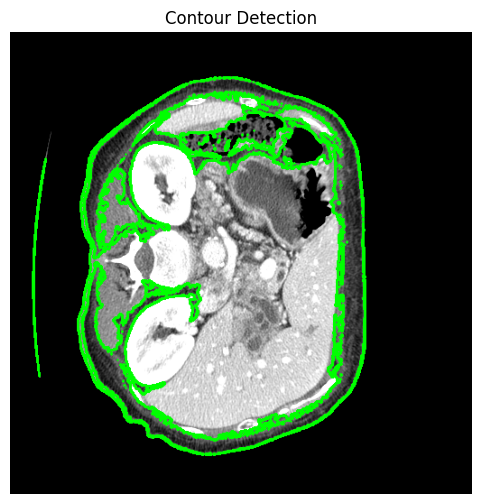

In [ ]:
def detect_contours(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply thresholding to binarize the image
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

    # Convert BGR to RGB for displaying with matplotlib
    contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(6, 6))
    plt.imshow(contour_image_rgb)
    plt.title("Contour Detection")
    plt.axis('off')
    plt.show()

# Detect contours on a sample image
sample_image_path = os.path.join(X_train_dir, os.listdir(X_train_dir)[0])
detect_contours(sample_image_path)

## 3.2 Class Distribution (Label Balance)

X_test: 1835 files
X_train: 9897 files
Y_test: 1875 files
Y_train: 9165 files


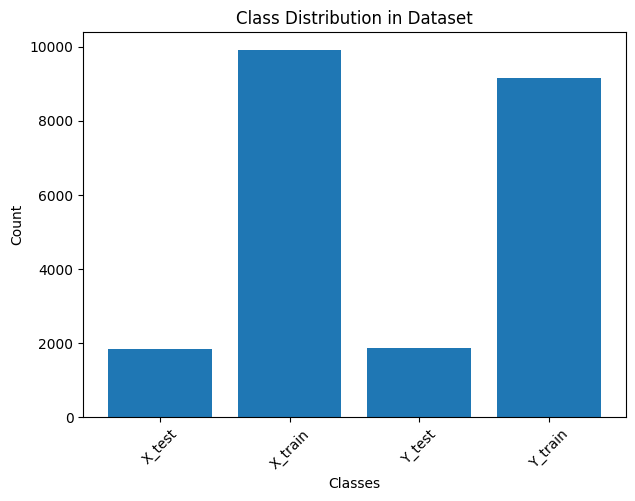

Y_test_Organ: 1875 files
Y_train_Organ: 9155 files
Y_test_Cancer: 1945 files
Y_train_Cancer: 9195 files


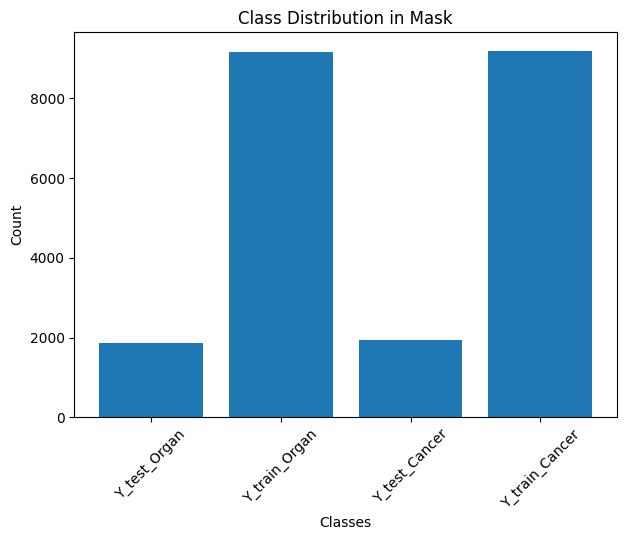

In [ ]:
# Define the root directories for Dataset and Mask
dataset_root_dir = '/content/drive/MyDrive/archive/Dataset/Dataset'
mask_root_dir = '/content/drive/MyDrive/archive/Mask/Mask'

def plot_class_distribution(folder):
    # Get list of subdirectories (which represent classes)
    subfolders = [subfolder for subfolder in os.listdir(folder) if os.path.isdir(os.path.join(folder, subfolder))]

    # Initialize a dictionary to store counts of files in each subfolder
    class_counts = {}

    # Loop through each subfolder and count the files
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder, subfolder)
        # Count number of files in each subfolder
        num_files = len(os.listdir(subfolder_path))
        class_counts[subfolder] = num_files

    # Print the class distribution
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} files")

    # Plot the class distribution
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(7, 5))
    plt.bar(classes, counts)
    plt.title(f"Class Distribution in {folder.split('/')[-1]}")
    plt.xlabel("Classes")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Plot class distribution for Dataset subfolders
plot_class_distribution(dataset_root_dir)

# Plot class distribution for Mask subfolders
plot_class_distribution(mask_root_dir)

### 3.3 Visualizing Mask Images

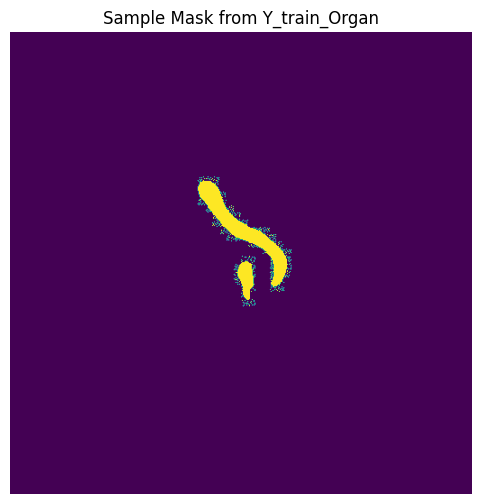

In [ ]:
# Display a sample mask from Y_train_Organ
sample_mask_path = os.path.join(Y_train_Organ_dir, os.listdir(Y_train_Organ_dir)[0])
display_image(sample_mask_path, "Sample Mask from Y_train_Organ")

## 3.4 Data Integrity check

In [ ]:
dataset_pairs = os.listdir('/content/drive/MyDrive/archive/Dataset/Dataset/X_train')
mask_pairs = os.listdir('/content/drive/MyDrive/archive/Mask/Mask/Y_train_Organ')
unmatched_files = set(dataset_pairs) - set(mask_pairs)
print(f"Unmatched files: {unmatched_files}")
print(len(unmatched_files))

Unmatched files: {'461 (1).png', '8701 (1).png', '1449 (2).png', '13482 (1).png', '8301 (1).png', '16076 (2).png', '2140 (1).png', '6609 (1).png', '15001 (1).png', '9176 (1).png', '6104 (1).png', '3441 (1).png', '6141 (2).png', '2597 (1).png', '14059 (1).png', '1256 (1).png', '17505 (1).png', '11095 (1).png', '8067 (1).png', '15248 (1).png', '889 (1).png', '1731 (2).png', '16075 (1).png', '16498 (3).png', '14156 (1).png', '18264 (2).png', '17278 (1).png', '12013 (1).png', '11306 (1).png', '16076 (1).png', '15160 (1).png', '9754 (1).png', '6447 (1).png', '11713 (1).png', '11491 (2).png', '7899 (1).png', '16468 (1).png', '16936 (1).png', '18266 (1).png', '11048 (1).png', '19122 (2).png', '3428 (1).png', '10410 (1).png', '10882 (2).png', '15151 (1).png', '3495 (2).png', '7622 (2).png', '13892 (2).png', '17111 (1).png', '13119 (1).png', '6141 (3).png', '15996 (1).png', '2597 (2).png', '6509 (2).png', '2993 (1).png', '13875 (1).png', '11048 (2).png', '4532 (1).png', '12357 (1).png', '3868 (

### mask overlap check

Overlap detected between masks!


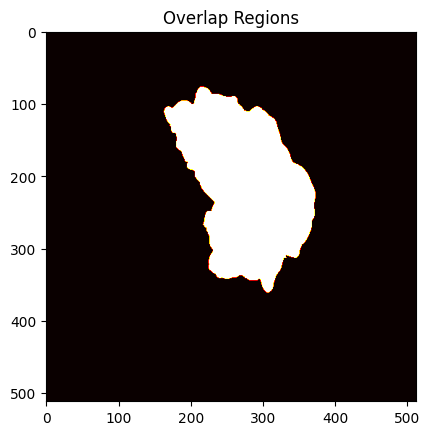

In [ ]:
import numpy as np
def check_mask_overlap(mask_paths):
    """
    Check for overlapping regions between multiple masks.

    Parameters:
        mask_paths (list): List of paths to the mask images.

    Returns:
        overlap_map (np.array): Array showing overlap regions.
        overlap_exists (bool): True if overlap exists, False otherwise.
    """
    # Load the first mask to initialize
    combined_mask = np.zeros_like(np.array(Image.open(mask_paths[0])))

    overlap_map = np.zeros_like(combined_mask)  # To track overlaps
    overlap_exists = False

    for mask_path in mask_paths:
        mask = np.array(Image.open(mask_path))

        # Detect overlapping regions
        overlap = (combined_mask > 0) & (mask > 0)
        overlap_map[overlap] = 1  # Mark overlap in the map

        if np.any(overlap):  # If any overlap exists
            overlap_exists = True

        # Update the combined mask
        combined_mask = combined_mask + mask

    return overlap_map, overlap_exists

# Example Usage
mask_folder = "/content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer"
mask_files = [os.path.join(mask_folder, file) for file in os.listdir(mask_folder) if file.endswith(".png")]

# Check for overlaps
overlap_map, overlap_exists = check_mask_overlap(mask_files)

if overlap_exists:
    print("Overlap detected between masks!")
    plt.imshow(overlap_map, cmap="hot")
    plt.title("Overlap Regions")
    plt.show()
else:
    print("No overlap detected between masks.")


## 3.5 Analyze Spatial Characteristics

In [ ]:
for folder in ['X_train', 'X_test']:
    for file in os.listdir(f'/content/drive/MyDrive/archive/Dataset/Dataset/{folder}'):
        img = Image.open(f'/content/drive/MyDrive/archive/Dataset/Dataset/{folder}/{file}')
        print(img.size)


Streaming output truncated to the last 5000 lines.
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(51

## 3.6 Bounding Box Analysis:

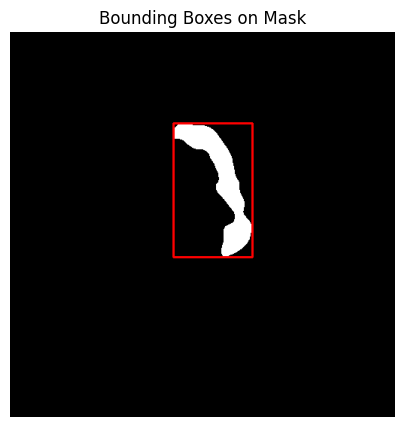

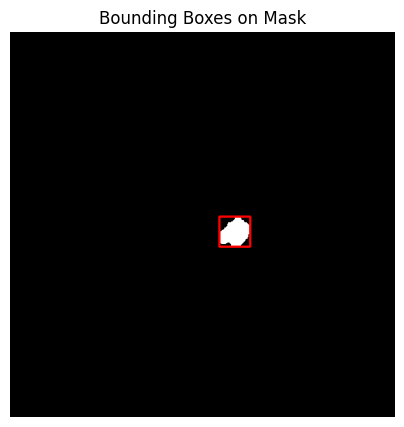

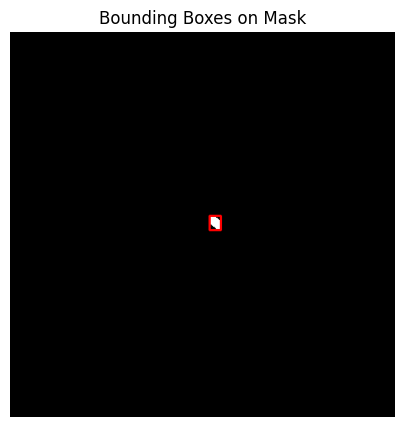

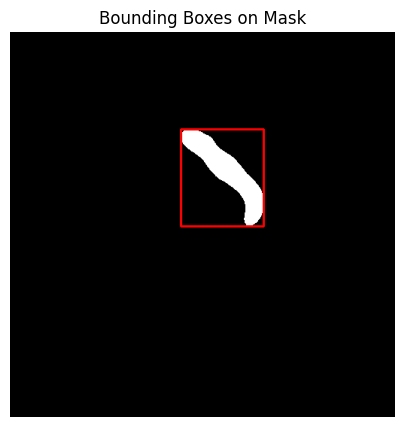

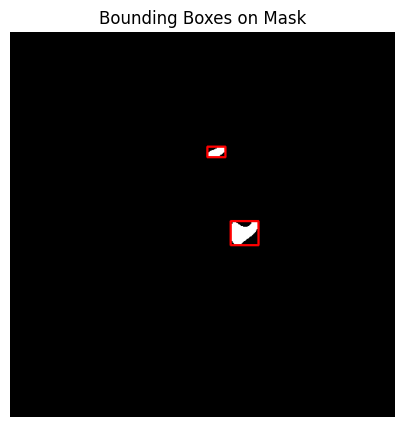

In [ ]:
def plot_bounding_boxes(mask_path):
    """
    Plot bounding boxes around objects in a segmentation mask.

    Parameters:
        mask_path (str): Path to the mask image.
    """
    # Read the mask image
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        print(f"Could not load mask: {mask_path}")
        return

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Convert mask to RGB for visualization
    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

    # Draw bounding boxes on the mask
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(mask_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue bounding box

    # Plot the mask with bounding boxes
    plt.figure(figsize=(5, 5))
    plt.imshow(mask_rgb)
    plt.title("Bounding Boxes on Mask")
    plt.axis("off")
    plt.show()

# Example Usage
mask_path=('/content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer/9968_modified.png')
mask_path1=('/content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer/36_modified.png')
mask_path2=('/content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer/244_modified.png')
mask_path3=('/content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer/735_modified.png')
mask_path4=('/content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer/19163_modified.png')
plot_bounding_boxes(mask_path)
plot_bounding_boxes(mask_path1)
plot_bounding_boxes(mask_path2)
plot_bounding_boxes(mask_path3)
plot_bounding_boxes(mask_path4)



## 3.7  Feature Distribution and Class Balance


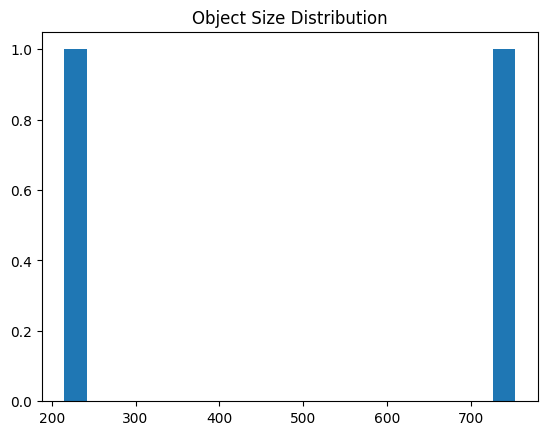

In [ ]:
def calculate_object_sizes(mask_path):
    mask = cv2.imread(mask_path, 0)
    _, _, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)
    sizes = stats[1:, cv2.CC_STAT_AREA]  # Skip the background
    return sizes

object_sizes = calculate_object_sizes('/content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer/19163_modified.png')
plt.hist(object_sizes, bins=20)
plt.title('Object Size Distribution')
plt.show()


## 3.8 Pixel Ratio Analysis:

In [ ]:
def calculate_foreground_ratio(mask_path):
    mask = cv2.imread(mask_path, 0)
    foreground = np.count_nonzero(mask)
    total_pixels = mask.size
    background = total_pixels - foreground
    print(foreground,background,total_pixels)
    return foreground / background

fg_ratio = calculate_foreground_ratio('/content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer/9968_modified.png')
print(f"Foreground pixel ratio: {fg_ratio}")


5440 256704 262144
Foreground pixel ratio: 0.02119172276240339


## 3.9  Geometric Transformations

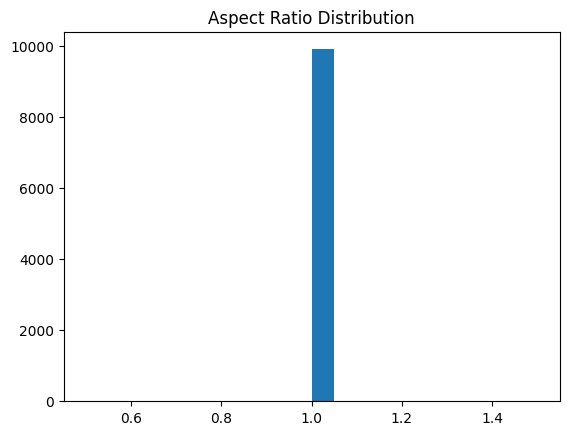

In [ ]:
def calculate_aspect_ratios(folder_path):
    ratios = []
    for file in os.listdir(folder_path):
        img = Image.open(os.path.join(folder_path, file))
        ratios.append(img.size[0] / img.size[1])
    return ratios

aspect_ratios = calculate_aspect_ratios('/content/drive/MyDrive/archive/Dataset/Dataset/X_train')
plt.hist(aspect_ratios, bins=20)
plt.title('Aspect Ratio Distribution')
plt.show()


## 3.10 Augmentation Simulation

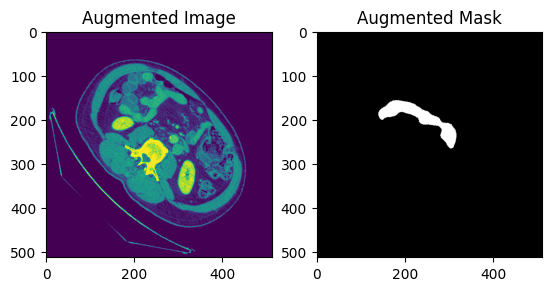

In [ ]:
from torchvision.transforms import functional as F
from PIL import Image

img = Image.open('/content/drive/MyDrive/archive/Dataset/Dataset/X_train/19011.png')
mask = Image.open('/content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer/9968_modified.png')

img_aug = F.rotate(img, angle=45)
mask_aug = F.rotate(mask, angle=45)

plt.subplot(1, 2, 1)
plt.imshow(img_aug)
plt.title('Augmented Image')

plt.subplot(1, 2, 2)
plt.imshow(mask_aug, cmap='gray')
plt.title('Augmented Mask')
plt.show()


## 3.11  Outlier Detection Based on Foreground Pixel Ratio

Outliers detected: 292
Outlier: /content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer/827_modified (1).png, Foreground Ratio: 0.0190, Z-score: 3.5195736298090354
Outlier: /content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer/827_modified.png, Foreground Ratio: 0.0190, Z-score: 3.5195736298090354
Outlier: /content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer/832_modified.png, Foreground Ratio: 0.0149, Z-score: 2.576569534508962
Outlier: /content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer/826_modified.png, Foreground Ratio: 0.0179, Z-score: 3.268395580461827
Outlier: /content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer/825_modified.png, Foreground Ratio: 0.0158, Z-score: 2.772992507354876
Outlier: /content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer/830_modified.png, Foreground Ratio: 0.0182, Z-score: 3.328365426153721
Outlier: /content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer/8526_modified.png, Foreground Ratio: 0.0146, Z-score: 2.5218144580076673
Outlier: /content

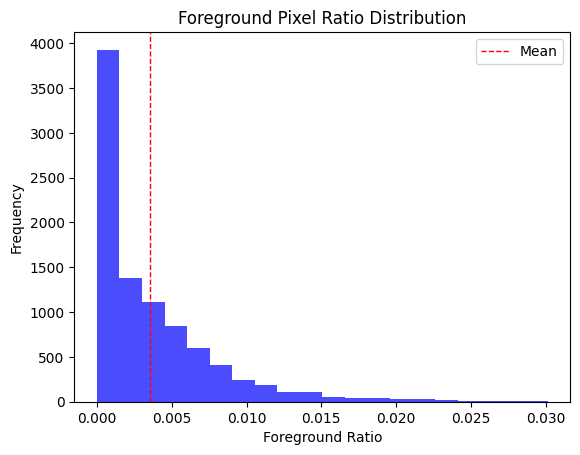

In [ ]:
def calculate_foreground_ratio(mask_path):
    """
    Calculate the ratio of foreground pixels in a mask.

    Parameters:
        mask_path (str): Path to the mask image.

    Returns:
        float: Foreground pixel ratio (foreground pixels / total pixels).
    """
    mask = np.array(Image.open(mask_path).convert("L"))
    foreground_pixels = np.count_nonzero(mask)
    total_pixels = mask.size
    return foreground_pixels / total_pixels

def detect_outliers_foreground_ratios(mask_folder, z_thresh=2.5):
    """
    Detect outlier masks based on foreground pixel ratio using Z-scores.

    Parameters:
        mask_folder (str): Path to the folder containing masks.
        z_thresh (float): Z-score threshold for detecting outliers.

    Returns:
        list: List of outlier masks and their ratios.
    """
    ratios = []
    mask_paths = [os.path.join(mask_folder, f) for f in os.listdir(mask_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Calculate foreground pixel ratios
    for mask_path in mask_paths:
        ratios.append(calculate_foreground_ratio(mask_path))

    # Calculate Z-scores
    mean_ratio = np.mean(ratios)
    std_ratio = np.std(ratios)
    z_scores = [(ratio - mean_ratio) / std_ratio for ratio in ratios]

    # Identify outliers
    outliers = [(mask_paths[i], ratios[i], z_scores[i]) for i, z in enumerate(z_scores) if abs(z) > z_thresh]

    return outliers, ratios

# Example Usage
mask_folder = "/content/drive/MyDrive/archive/Mask/Mask/Y_train_Cancer"
outliers, ratios = detect_outliers_foreground_ratios(mask_folder)

# Print Outliers
print(f"Outliers detected: {len(outliers)}")
for mask_path, ratio, z_score in outliers:
    print(f"Outlier: {mask_path}, Foreground Ratio: {ratio:.4f}, Z-score: {z_score}")

# Plot Foreground Ratios
plt.hist(ratios, bins=20, color="blue", alpha=0.7)
plt.axvline(np.mean(ratios), color='red', linestyle='dashed', linewidth=1, label="Mean")
plt.title("Foreground Pixel Ratio Distribution")
plt.xlabel("Foreground Ratio")
plt.ylabel("Frequency")
plt.legend()
plt.show()
